In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.linear_model import Perceptron
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegressionCV as LogReg
import seaborn as sns

In [8]:
X, y = make_moons(n_samples=500, noise=0.2)

Risk: 0.1466666666666666


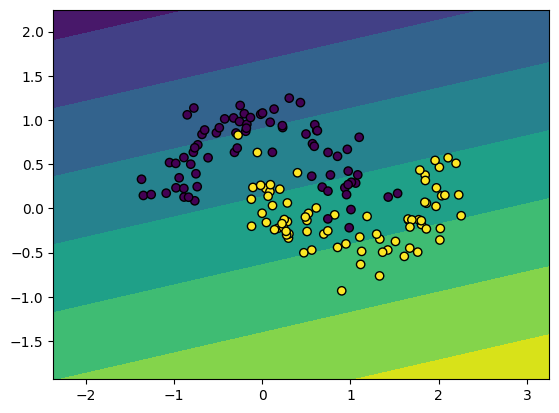

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
clf = LogReg()
clf.fit(X_train,y_train)
clf.score(X_test, y_test)

print("Risk:", (1 - clf.score(X_test, y_test)))

from sklearn.inspection import DecisionBoundaryDisplay
disp = DecisionBoundaryDisplay.from_estimator(clf, X_test, response_method="auto")
disp.ax_.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor="k")



0.8933333333333333


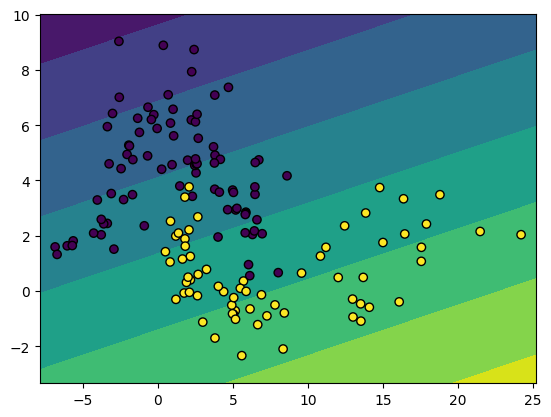

In [10]:
#Commented out code was used to determine the best performing polynomial x^a + bx + c, where X is the data.
# Nested for loops were used to go through values 0-4 for a, b, and c.
# Dataframe was sorted and then outputted to a CSV file (the sort wasn't really working properly, so I sorted with excel)
# The best performing polynomial is coded below and a visual represetnation of the datapoints is shown below. 

# model_score = []
# i_value = []
# j_value = []
# k_value = []

# for i in range (0,5):
#     for j in range (0,5):
#         for k in range (0,5):
#             score = 0
#             for l in range (0,5):
#                 X1 = X**i + X*j + k
#                 X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.30)
#                 clf = LogReg()
#                 clf.fit(X_train,y_train)
#                 score += clf.score(X_test, y_test)
#             i_value.append(i)
#             j_value.append(j)
#             k_value.append(k)
#             model_score.append(score/5)

# d = {'model_score': model_score, 'i_value': i_value, 'j_value': j_value, 'k_value': k_value}
# df = pd.DataFrame(data=d)
# df.sort_values(by='model_score')
# df.to_csv("./out.csv")

X1 = X[:,0]
X2 = X[:,1]

#make new dataframe with new features
d = {'X': X, 'X1': X1, 'X2': X2}
df = pd.DataFrame(X1, X2)
df.to_csv("./shut the hell up.csv")



X_best = X**3 + X*4 + 1
X_train, X_test, y_train, y_test = train_test_split(X_best, y, test_size=0.30)
clf = LogReg()
clf.fit(X_train,y_train)
print(clf.score(X_test, y_test))

from sklearn.inspection import DecisionBoundaryDisplay
disp = DecisionBoundaryDisplay.from_estimator(clf, X_test, response_method="auto")
disp.ax_.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor="k")



In [11]:
X1 = X[:,0] #x value
Y1 = X[:,0] #y value
X2 = X[:,0]*2 #x value
Y2 = X[:,1]*2 #y value
X3 = X[:,0]**2 #x value
Y3 = X[:,1]**2 #y value


XY12= np.column_stack([X1,Y2])
XY13= np.column_stack([X1,Y3])
XY22= np.column_stack([X2,Y2])
XY23= np.column_stack([X2,Y3])
XY32= np.column_stack([X3,Y2])
XY33= np.column_stack([X3,Y3])

df_data = np.column_stack([XY12,XY13,XY22,XY23,XY32,XY33])
df = pd.DataFrame(df_data, columns = ['X1', 'Y2', 'X1', 'Y3', 'X2', 'Y2', 'X2', 'Y3', 'X3', 'Y2', 'X3', 'Y3'])

2
(1, 2)


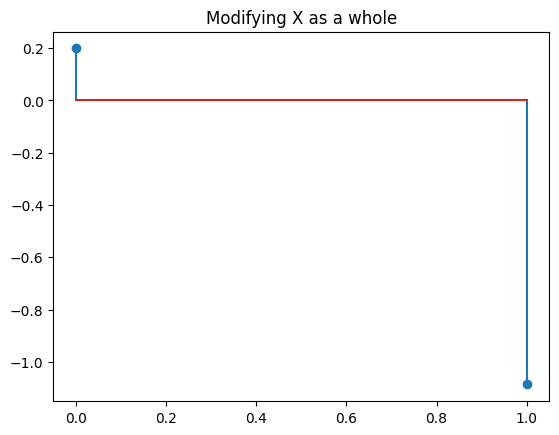

In [12]:
print(clf.n_features_in_)
print(clf.coef_.shape)
plt.stem(clf.coef_[0,:])
plt.title("Modifying X as a whole")
plt.show()

0.8466666666666667


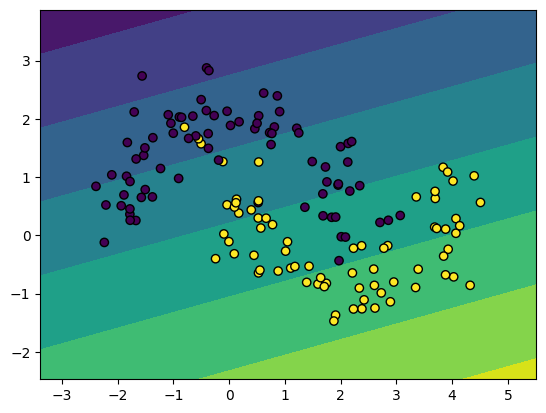

In [13]:
X_train, X_test, y_train, y_test = train_test_split(XY22, y, test_size=0.30)
clf_mod = LogReg()
clf_mod.fit(X_train,y_train)
print(clf_mod.score(X_test, y_test))

#c
from sklearn.inspection import DecisionBoundaryDisplay
disp = DecisionBoundaryDisplay.from_estimator(clf_mod, X_test, response_method="auto")
disp.ax_.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor="k")